# Домашнее задание 3: Линейные модели. Работа с признаками

Правила:

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os 
path = os.getcwd()

data = pd.read_csv('diamonds.csv')
#data = pd.read_csv(f'{path}/Data/diamonds.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 1.** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [4]:
data.isnull().any().any()

False

**Задача 2.** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [6]:
data = data.drop("Unnamed: 0", axis=1)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего? Здесь вам поможет корреляционная матрица Пирсона.

In [9]:
numericData = data._get_numeric_data()
numericData.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


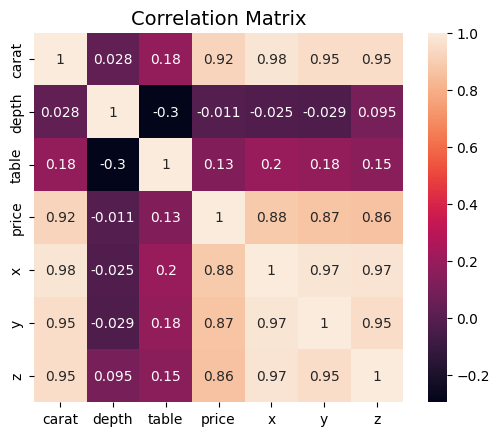

In [15]:
plt.title('Correlation Matrix', size=14)
sns.heatmap(numericData.corr(), square=True, linecolor='white', annot=True)
plt.show()

**Задача 4.** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [17]:
dataDum = pd.get_dummies(data, drop_first=True, dtype=int)
dataDum.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задача 5.** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

**Не забудьте зафиксировать** `np.random.seed()` равный вашему номеру по списку для воспроизводимости результатов.

In [56]:
np.random.seed(12)

In [57]:
from sklearn.model_selection import train_test_split

X = dataDum.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [46]:
X_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
16259,1.01,62.0,57.0,6.44,6.36,3.97,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
24005,1.54,62.6,56.0,7.42,7.35,4.62,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
12211,1.15,63.1,63.0,6.63,6.53,4.15,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
37918,0.41,60.6,57.0,4.79,4.84,2.92,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
181,0.54,61.5,57.0,5.24,5.26,3.23,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


**Задача 6.** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

**Важно**: масштабируются только вещественные признаки. В их число не должны попасть бинаризованные категориальные признаки.

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

signs = ['carat', 'depth', 'x', 'y', 'z']
X_train[signs] = scaler.fit_transform(X_train[signs])
X_test[signs] = scaler.transform(X_test[signs])

X_test.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
10176,0.635415,0.170523,55.0,0.781869,0.791735,0.802328,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
16083,1.035685,0.588814,56.0,1.093490,1.034149,1.139814,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
13420,0.846083,-0.456913,58.0,1.022262,0.921600,0.900762,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
20407,1.478088,-0.596343,56.0,1.511952,1.406428,1.350743,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8909,0.214078,-0.038622,57.0,0.390117,0.410799,0.394533,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


**Задача 7.** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#обучение
reg_lr = LinearRegression()
reg_lr.fit(X_train, y_train)

#предсказание результатов
y_pred_train = reg_lr.predict(X_train)
y_pred_test = reg_lr.predict(X_test)

#вычисление ошибки
mse_train = mean_squared_error(y_true=y_train, y_pred=y_pred_train)
mse_test = mean_squared_error(y_true=y_test, y_pred=y_pred_test)

print("MSE train: ", mse_train)
print("MSE test: ", mse_test)

MSE train:  1284661.862119126
MSE test:  1259159.1137946623


**Задача 8.** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [66]:
coefs = pd.DataFrame(reg_lr.coef_, index=X_train.columns, columns=['coefs'])
coefs.sort_values('coefs', ascending=False)

,coefs
clarity_IF,5333.555069
carat,5278.119984
clarity_VVS1,5021.558583
clarity_VVS2,4954.598502
clarity_VS1,4592.448267
clarity_VS2,4272.557381
clarity_SI1,3670.378092
clarity_SI2,2701.868098
cut_Ideal,795.786817
cut_Premium,721.797535


**Задача 9.** Как можно заметить из анализа корреляционной матрицы в **задаче 3**, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [68]:
from sklearn.linear_model import Ridge, Lasso


lasso = Lasso(alpha=10.0).fit(X_train, y_train)
lasso_coefs = pd.DataFrame(lasso.coef_, index=X_train.columns, columns=['coefs'])
lasso_coefs.sort_values('coefs', ascending=False)


Lasso


,coefs
carat,4718.432204
clarity_IF,1363.415788
clarity_VVS1,1240.780291
clarity_VVS2,1238.614596
clarity_VS1,907.386001
clarity_VS2,653.716506
cut_Ideal,143.432791
cut_Very Good,77.312024
clarity_SI1,69.186577
cut_Premium,61.278250


In [69]:
ridge = Ridge(alpha=10.0).fit(X_train,y_train)
ridge_coefs = pd.DataFrame(ridge.coef_, index=X_train.columns, columns=['coefs'])
ridge_coefs.sort_values('coefs', ascending=False)

,coefs
carat,5228.444119
clarity_IF,4760.466823
clarity_VVS1,4470.741896
clarity_VVS2,4411.388531
clarity_VS1,4055.759256
clarity_VS2,3741.389672
clarity_SI1,3142.788415
clarity_SI2,2182.152704
cut_Ideal,823.260032
cut_Premium,746.127257


**Задача 10.** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 0.5, 1, 10, 100 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

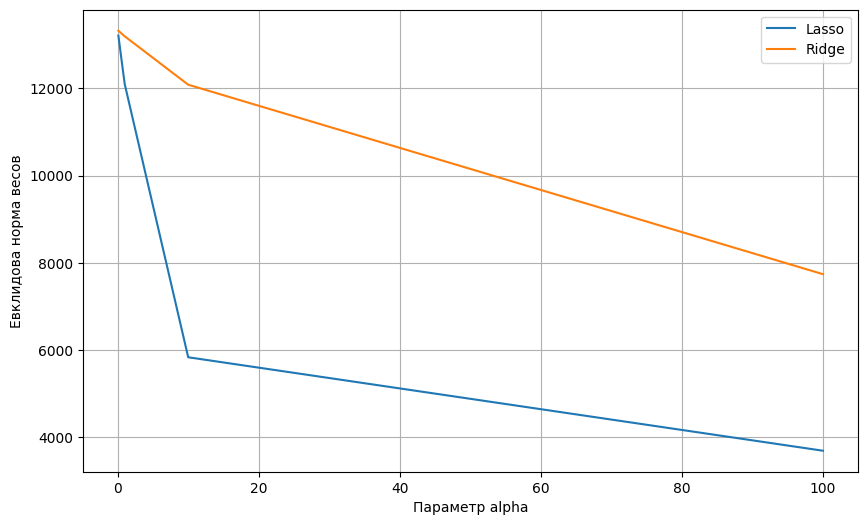

In [70]:
a = [0.1, 0.5, 1, 10, 100]

lasso_arr = []
ridge_arr = []

for i in a:
    ridge = Ridge(alpha=i).fit(X_train,y_train)
    ridge_arr.append(np.linalg.norm(ridge.coef_))

    lasso = Lasso(alpha=i).fit(X_train, y_train)
    lasso_arr.append(np.linalg.norm(lasso.coef_))


plt.figure(figsize=(10, 6))
plt.plot(a, lasso_arr, label='Lasso')
plt.plot(a, ridge_arr, label='Ridge')
plt.xlabel('Параметр alpha')
plt.ylabel('Евклидова норма весов')
plt.legend()
plt.grid(True)
plt.show()

#Lasso намного агрессивнее уменьшает веса, некторые даже может занулять. Lasso-регрессию используют из-за способности обнулять неинформативные признаки, чтобы они не влияли на обучение

**Задача 11.** 
В зависимости от значения параметра $\alpha$ Lasso-регрессия выбирает наиболее важные признаки и уменьшать влияние незначимых признаков за счет регуляризации L1. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [72]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=a, cv=5).fit(X_train, y_train)

mean_mse = np.mean(lasso_cv.mse_path_, axis=1)

cv_lasso_table = pd.DataFrame({'MSE': mean_mse, 'alpha': a})

print("Лучшее значение альфа: ", a[np.argmin(mean_mse)])

cv_lasso_table

C:\Users\a.z\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 688879670.268219, tolerance: 48309472.87280812
  model = cd_fast.enet_coordinate_descent_gram(


Лучшее значение альфа:  10


,MSE,alpha
0,2.228059e+06,0.1
1,1.518121e+06,0.5
2,1.292181e+06,1.0
3,1.289480e+06,10.0
4,1.293606e+06,100.0


**Задача 12.** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [74]:

lasso = Lasso(alpha=10).fit(X_train, y_train)
lasso_coefs = pd.DataFrame(lasso.coef_, index=X_train.columns, columns=['coefs'])
lasso_coefs

#Неинформативные (занулились): y, color_F, cut_Gold.
#Информативные: carat, depth, clarity (в целом важный параметр для данных о брилиантах)


,coefs
carat,4718.432204
depth,-157.231614
table,-55.586330
x,-634.551615
y,-0.000000
z,-24.227024
cut_Good,-0.000000
cut_Ideal,143.432791
cut_Premium,61.278250
cut_Very Good,77.312024


**Задача 13.** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [77]:
y_pred_test_lasso = lasso.predict(X_test)
#вычисление ошибки
mse_test = mean_squared_error(y_true=y_test, y_pred=y_pred_test)
mse_test_lasso = mean_squared_error(y_true=y_test, y_pred=y_pred_test_lasso)

print("MSE test lin reg: ", mse_test)
print("MSE test lasso: ", mse_test_lasso)

MSE test lin reg:  1259159.1137946623
MSE test lasso:  1491108.576788343
